# WeatherPy

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | happy valley-goose bay
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | north bend
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | monifieth
Processing Record 9 of Set 1 | roma
Processing Record 10 of Set 1 | castillos
Processing Record 11 of Set 1 | berezovyy
Processing Record 12 of Set 1 | calama
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | el bauga
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | forster
Processing Record 21 of Set 1 | ikirun
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | sirte
Processing Record 40 of Set 4 | isafjordur
Processing Record 41 of Set 4 | takoradi
Processing Record 42 of Set 4 | uturoa
Processing Record 43 of Set 4 | afaahiti
Processing Record 44 of Set 4 | bayanaul
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | konarka
Processing Record 47 of Set 4 | korla
Processing Record 48 of Set 4 | klina
Processing Record 49 of Set 4 | ocean pines
Processing Record 0 of Set 5 | kamakwie
Processing Record 1 of Set 5 | shindand
Processing Record 2 of Set 5 | tommot
Processing Record 3 of Set 5 | benton
Processing Record 4 of Set 5 | mostaganem
Processing Record 5 of Set 5 | arsen'yev
Processing Record 6 of Set 5 | badger
Processing Record 7 of Set 5 | alotau
City not found. Skipping...
Processing Record 8 of Set 5 | zabol
Processing Record 9 of Set 5 | puerto aysen
Processing Record 10 of Set 5 | san antonio de pale
Processing Record 11 of Set 5 | arrifes
Processing Record 12 of Set 5 | kodiak
Pro

Processing Record 31 of Set 8 | chos malal
Processing Record 32 of Set 8 | monrovia
Processing Record 33 of Set 8 | wanning
Processing Record 34 of Set 8 | colonia
Processing Record 35 of Set 8 | ahfir
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | antofagasta
Processing Record 38 of Set 8 | benidorm
Processing Record 39 of Set 8 | el granada
Processing Record 40 of Set 8 | cole harbour
Processing Record 41 of Set 8 | heves
Processing Record 42 of Set 8 | babolsar
Processing Record 43 of Set 8 | porto novo
Processing Record 44 of Set 8 | hassi messaoud
Processing Record 45 of Set 8 | north bay
Processing Record 46 of Set 8 | dodge city
Processing Record 47 of Set 8 | susanville
Processing Record 48 of Set 8 | vilyuchinsk
Processing Record 49 of Set 8 | kulia village
City not found. Skipping...
Processing Record 0 of Set 9 | aykhal
Processing Record 1 of Set 9 | usogorsk
Processing Record 2 of Set 9 | brigantine
Processing Record 3 of Set 9 | coronel dorrego
P

Processing Record 20 of Set 12 | bonthe
Processing Record 21 of Set 12 | montepuez
Processing Record 22 of Set 12 | businga
Processing Record 23 of Set 12 | yerofey pavlovich
Processing Record 24 of Set 12 | bodaybo
Processing Record 25 of Set 12 | pumwani
City not found. Skipping...
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | dolores
Processing Record 28 of Set 12 | melekeok village
Processing Record 29 of Set 12 | acapulco de juarez
Processing Record 30 of Set 12 | huntsville
Processing Record 31 of Set 12 | chimbote
Processing Record 32 of Set 12 | el calafate
Processing Record 33 of Set 12 | camiri
Processing Record 34 of Set 12 | bam
Processing Record 35 of Set 12 | buala
Processing Record 36 of Set 12 | reserva
Processing Record 37 of Set 12 | maradi
Processing Record 38 of Set 12 | tangalle
Processing Record 39 of Set 12 | paracuru
Processing Record 40 of Set 12 | angaur state
-----------------------------
Data Retrieval Complete      
--------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,happy valley-goose bay,53.3168,-60.3315,-6.83,73,20,2.57,CA,1702497214
1,bethel,41.3712,-73.4140,7.33,47,0,6.69,US,1702496989
2,ancud,-41.8697,-73.8203,13.23,64,76,4.84,CL,1702497214
3,yellowknife,62.4560,-114.3525,0.29,86,75,2.06,CA,1702497214
4,port-aux-francais,-49.3500,70.2167,7.80,96,100,19.60,TF,1702497214


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,happy valley-goose bay,53.3168,-60.3315,-6.83,73,20,2.57,CA,1702497214
1,bethel,41.3712,-73.4140,7.33,47,0,6.69,US,1702496989
2,ancud,-41.8697,-73.8203,13.23,64,76,4.84,CL,1702497214
3,yellowknife,62.4560,-114.3525,0.29,86,75,2.06,CA,1702497214
4,port-aux-francais,-49.3500,70.2167,7.80,96,100,19.60,TF,1702497214


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

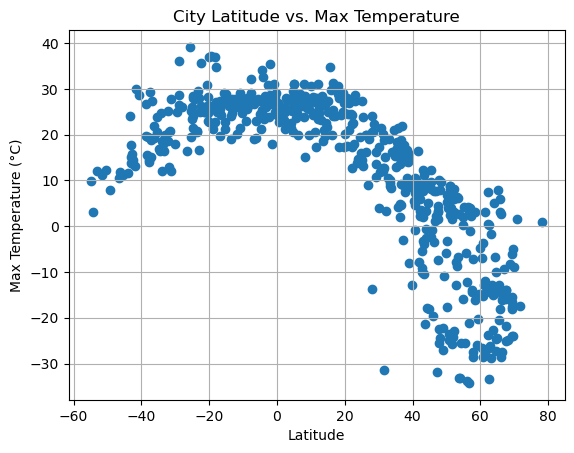

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

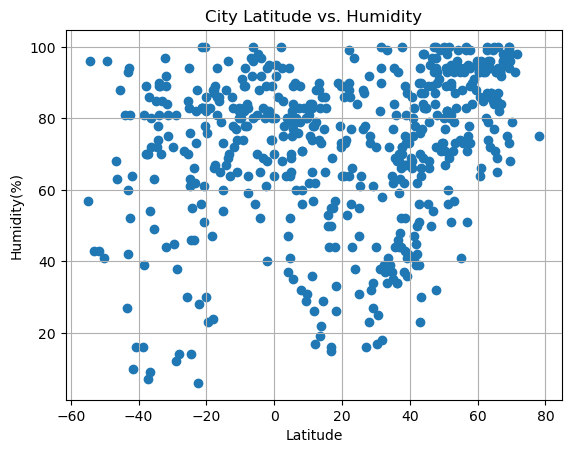

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

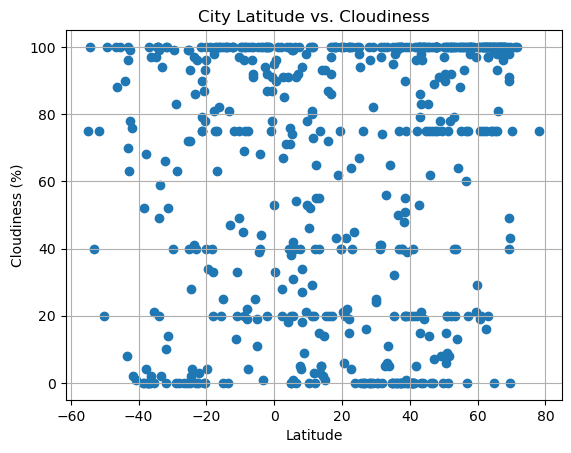

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

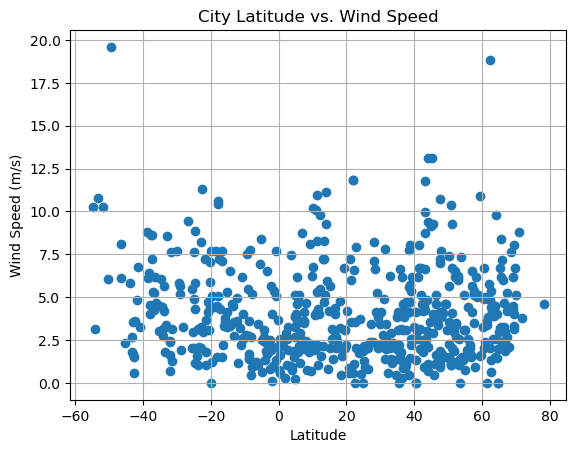

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, savefile):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = {:.2f}x + {:.2f}".format(slope, intercept)
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, color='red', label=line_eq)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.savefig(savefile)
    print(f"The r-value is: {r_value}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,happy valley-goose bay,53.3168,-60.3315,-6.83,73,20,2.57,CA,1702497214
1,bethel,41.3712,-73.4140,7.33,47,0,6.69,US,1702496989
3,yellowknife,62.4560,-114.3525,0.29,86,75,2.06,CA,1702497214
5,north bend,43.4065,-124.2243,11.20,87,0,2.57,US,1702497214
7,monifieth,56.4832,-2.8272,4.18,100,75,2.06,GB,1702497215


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ancud,-41.8697,-73.8203,13.23,64,76,4.84,CL,1702497214
4,port-aux-francais,-49.3500,70.2167,7.80,96,100,19.60,TF,1702497214
6,blackmans bay,-43.0167,147.3167,15.07,93,70,1.66,AU,1702497215
9,castillos,-34.1667,-53.8333,24.68,78,100,3.16,UY,1702497215
11,calama,-22.4667,-68.9333,26.27,6,0,11.32,CL,1702497215


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8369365125954515


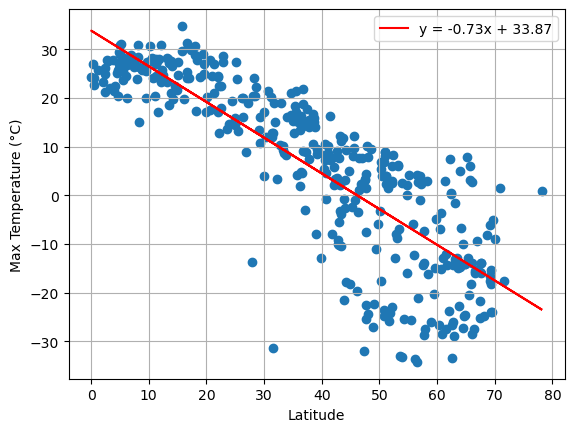

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    savefile="../output_data/LR_Northern_Hemi_Temperature.png",
)

The r-value is: 0.6267827814300424


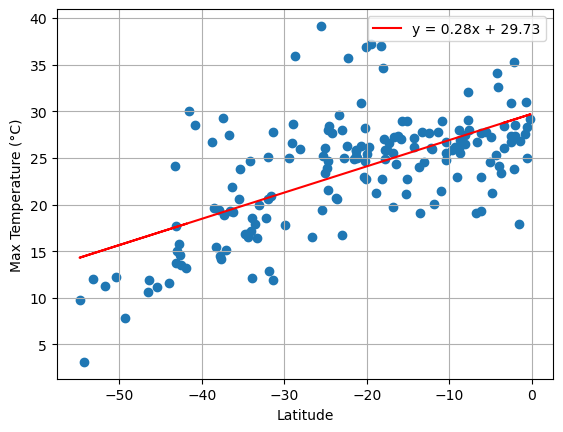

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    savefile="../output_data/LR_Southern_Hemi_Temperature.png"
)

**Discussion about the linear relationship:** 

- There is a noticeable tendency in the Northern Hemisphere that shows a decrease in temperature as latitude increases. This is in line with the theory that temperatures drop off as one moves farther from the equator, particularly in the direction of the poles

- As one approaches lower latitudes in the Southern Hemisphere, there is a moderate trend of rising temperatures. This is consistent with the widely held belief that areas nearer the equator typically experience higher temperatures

- The linerar regression models capture the general trend in temperatue fluctuation with latitude and are a reasonable match for the data, as indicated by the strong correlation coefficients in both hemispheres

All things, considered, these results lend credence to the hunch that latitude affects the highest temperatures in various hemispheres

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3582097363553898


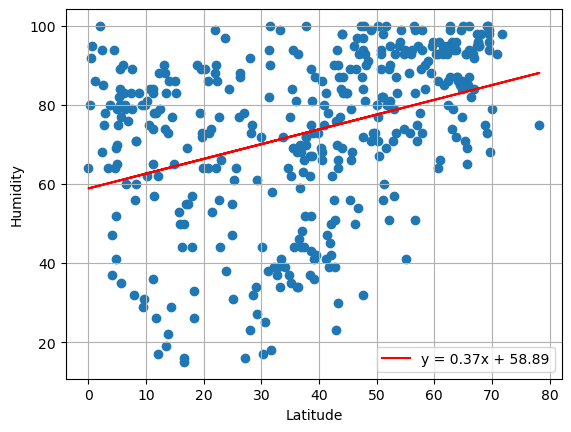

In [17]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity",
    savefile="../output_data/LR_Northern_Hemi_Temperature.png"
)

The r-value is: 0.2886261374221503


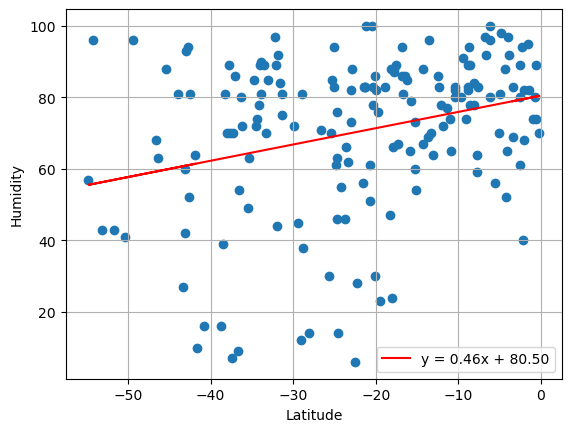

In [18]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity",
    savefile="../output_data/LR_Southern_Hemi_Temperature.png"
)

**Discussion about the linear relationship:**
- There is a modest tendency for higher latitudes (Northern Hemisphere) or lower latitudes (Southern Hemisphere) to have somewhat more humidity on average. Both hemispheres exhibit weak positive associations between latitude and humidity

- However, the scatter plots might show a significant degree of fluctuation, and the low correlation coefficients imply that latitude might not be a reliable indicator of humidity on its own. Humidity levels may also be greatly influenced by other elements like the topography of the area, its closeness to bodies of water, and the direction of the predominant winds

- Given that the link between latitude and humidity is probably influenced by a variety of geographical and meteorological factors, it is imperative to take these data into account in the context of regional and local climatic patterns

In conclusion, latitude and humidity have a weak positive association in both hemispheres, but overall, latitude has less of an impact on humidity than other variables that affect regional climate variability

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27338556104819706


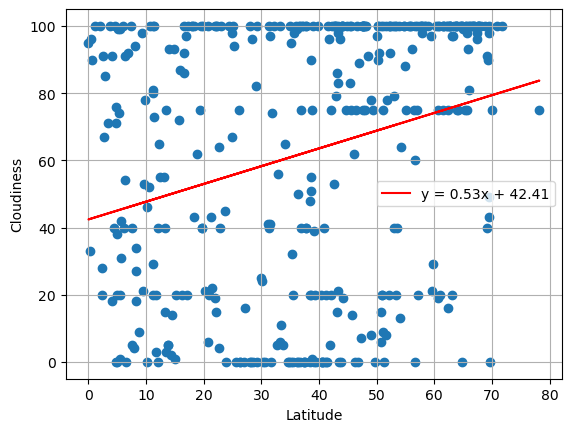

In [19]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness",
    savefile="../output_data/LR_Northern_Hemi_Temperature.png"
)

The r-value is: 0.1577340354008022


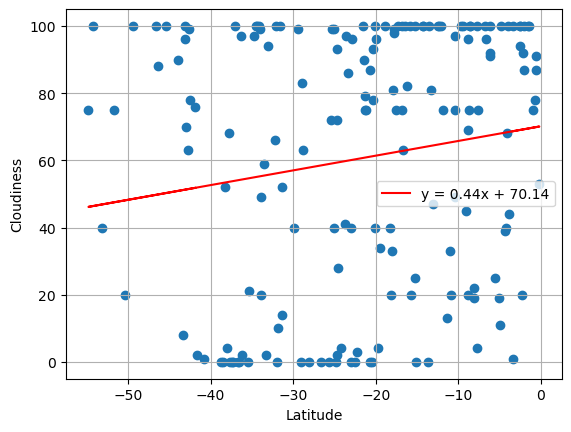

In [20]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness",
    savefile="../output_data/LR_Southern_Hemi_Temperature.png"
)

**Discussion about the linear relationship:** 
- There is a modest tendency for higher latitudes (Northern Hemisphere) or lower latitudes (Southern Hemisphere) to have slightly more cloudiness on average. Both hemispheres show weak positive associations between latitude and cloudiness
- The scatter plots and the comparatively low correlation coefficients show that cloudiness varies significantly and is not exclusively related to latitude. Cloud cover can be greatly influenced by regional topography, geography, and atmospheric circulation patterns
- It's crucial to remember that a variety of climatic conditions, such as proximity to big bodies of water, prevailing wind directions, and local weather patterns, affect cloudiness. These variables can differ significantly between regions, which adds to the observed variability

In conclusion, although there is a somewhat positive correlation between latitude and cloudiness in both hemispheres, latitude has a relatively little overall influence on cloudiness, and other regional and local factors contribute significantly to cloud cover

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08569321281455122


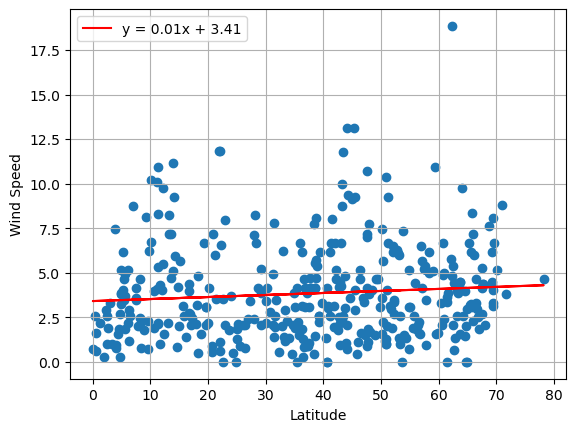

In [21]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed",
    savefile="../output_data/LR_Northern_Hemi_Temperature.png"
)

The r-value is: -0.3248594070491344


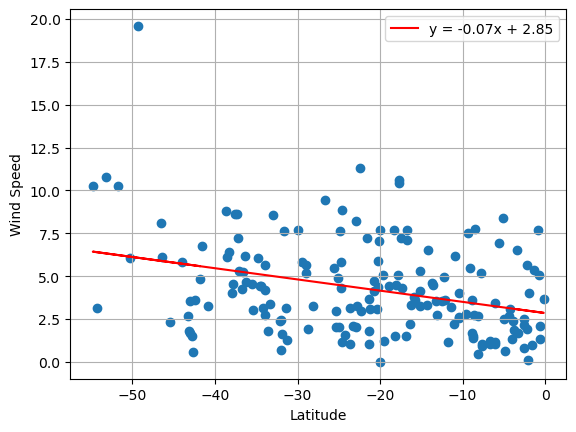

In [22]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed",
    savefile="../output_data/LR_Southern_Hemi_Temperature.png"
)

**Discussion about the linear relationship:**
- There is a very tiny tendency for higher latitudes (Northern Hemisphere) or lower latitudes (Southern Hemisphere) to have somewhat greater or lower wind speeds on average. Both hemispheres show weak correlations between latitude and wind speed
- The poor correlation coefficients imply that other factors, such as local terrain, proximity to bodies of water, and larger-scale atmospheric circulation patterns, probably have a greater influence on wind speed than latitude alone
- Numerous local and regional elements, such as the terrain, local geography, and the existence of natural barriers, affect wind speed. Additionally, wind patterns can be significantly influenced by broader atmospheric circulation patterns, such as the jet stream

In conclusion, latitude has relatively overall effect on wind speed, despite the very weak link that exists between two variables in both hemispheres. Variations in wind speed are probably more influenced by local and regional causes